# MobilePricing Classifier

Table of content:
* Exploring:
    * Data-set first look
    * Data Visualization
* Cleaning/Preparing Data
    * Data Imputation
        * `CustomImputer` Transformer
    * Feature Engineering
        * `FeaturesMaker` Transformer
    * Feature Selection
        * `FeatureSelector` Transformer
    * Data Scaling
        * `CustomSTDScaler` Transformer
    * Preparing Pipeline
* Models Evaluation
* Deployment of Preparing Pipeline and Best Model

## Exploring

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
dsdir = 'train.csv'

### Data-set first look

Let's inspect the first 10 data points:

In [3]:
LABEL = 'price_range'
ds = pd.read_csv(dsdir)
ds.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
5,1859,0,0.5,1,3.0,0.0,22.0,0.7,164.0,1.0,...,1004.0,1654.0,1067.0,17.0,1.0,10,1,0,0,1
6,1821,0,1.7,0,4.0,1.0,10.0,0.8,139.0,8.0,...,381.0,1018.0,3220.0,13.0,8.0,18,1,0,1,3
7,1954,0,0.5,1,0.0,0.0,24.0,0.8,187.0,4.0,...,512.0,1149.0,700.0,16.0,3.0,5,1,1,1,0
8,1445,1,0.5,0,0.0,0.0,53.0,0.7,174.0,7.0,...,386.0,836.0,1099.0,17.0,1.0,20,1,0,0,0
9,509,1,0.6,1,2.0,1.0,9.0,0.1,93.0,5.0,...,1137.0,1224.0,513.0,19.0,10.0,12,1,0,0,0


And see the data types of each column and whether any of them have null values or not:

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

And some statistics:

In [5]:
ds.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
def print_nan_columns(dataframe):
    notfound = True
    for col in dataframe.columns:
        nan_count = np.isnan(dataframe[col]).values.ravel().sum()
        if nan_count != 0:
            notfound = False
            print(f"'{col}' has {nan_count} nan value(s)!")
    if notfound:
        print('No column has nan or +/-inf.')

print_nan_columns(ds)

'fc' has 5 nan value(s)!
'four_g' has 5 nan value(s)!
'int_memory' has 5 nan value(s)!
'm_dep' has 5 nan value(s)!
'mobile_wt' has 4 nan value(s)!
'n_cores' has 4 nan value(s)!
'pc' has 5 nan value(s)!
'px_height' has 4 nan value(s)!
'px_width' has 2 nan value(s)!
'ram' has 2 nan value(s)!
'sc_h' has 1 nan value(s)!
'sc_w' has 1 nan value(s)!


Correlation matrix to assess the significance of each feature:

In [7]:
corr_matrix = ds.corr()
price_corr = corr_matrix[LABEL].sort_values(ascending=False)
price_corr

price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64

Analyzing the uniqueness of column values to differentiate discrete and continuous data:

In [8]:
for col in ds:
    print(f'Column["{col}"] has {ds[col].nunique()} unique values')
    print(f'And They are:\n{ds[col].unique()}')
    print('-------------------------------------------------------------------------')

Column["battery_power"] has 1094 unique values
And They are:
[ 842 1021  563 ... 1139 1467  858]
-------------------------------------------------------------------------
Column["blue"] has 2 unique values
And They are:
[0 1]
-------------------------------------------------------------------------
Column["clock_speed"] has 26 unique values
And They are:
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
-------------------------------------------------------------------------
Column["dual_sim"] has 2 unique values
And They are:
[0 1]
-------------------------------------------------------------------------
Column["fc"] has 20 unique values
And They are:
[ 1.  0.  2. 13.  3.  4.  5.  7. 11. 12. 16.  6. 15.  8.  9. 10. 18. nan
 17. 14. 19.]
-------------------------------------------------------------------------
Column["four_g"] has 2 unique values
And They are:
[ 0.  1. nan]
-------------------------------------------------------

### Visualization

Plot the values that has the strongest correlation:

In [9]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    figname = 'Mobile Price'
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {figname}', fontsize=15)
    plt.show()

['price_range', 'ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'sc_w', 'pc', 'fc', 'three_g', 'sc_h', 'talk_time', 'blue', 'touch_screen', 'mobile_wt']


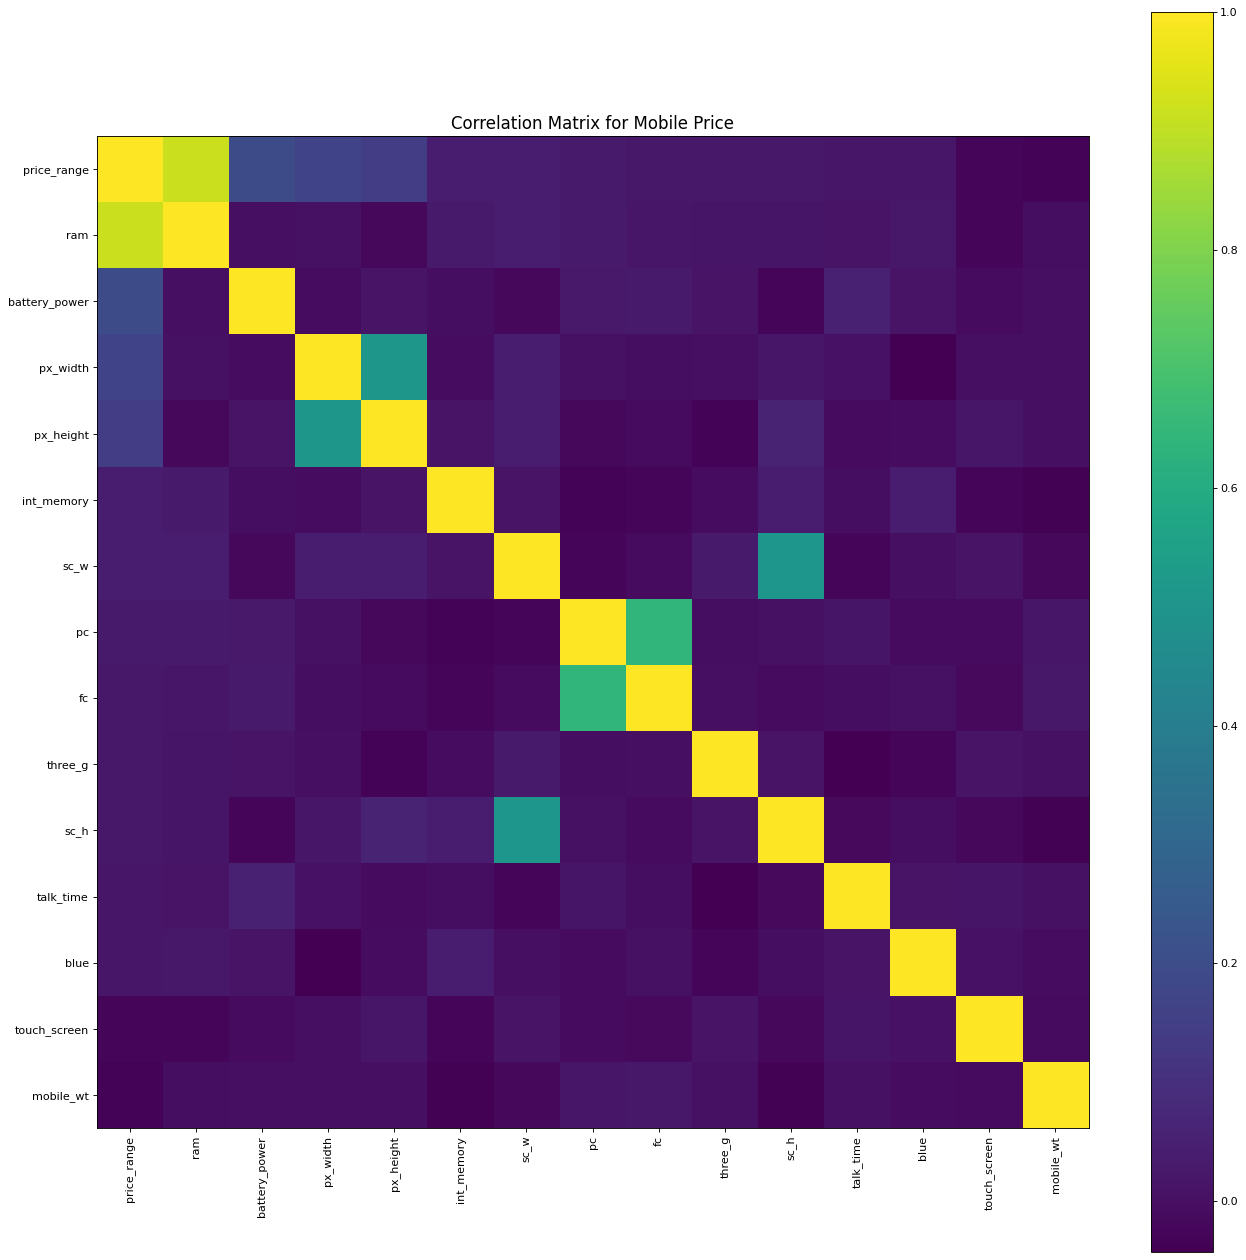

In [10]:
features = price_corr.index
threshold = 0.02
highest_corr_features = [
    feature for feature in features 
    if price_corr[feature] >= threshold or price_corr[feature] <= -threshold
]
print(highest_corr_features)
plotCorrelationMatrix(ds[highest_corr_features], 20)

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

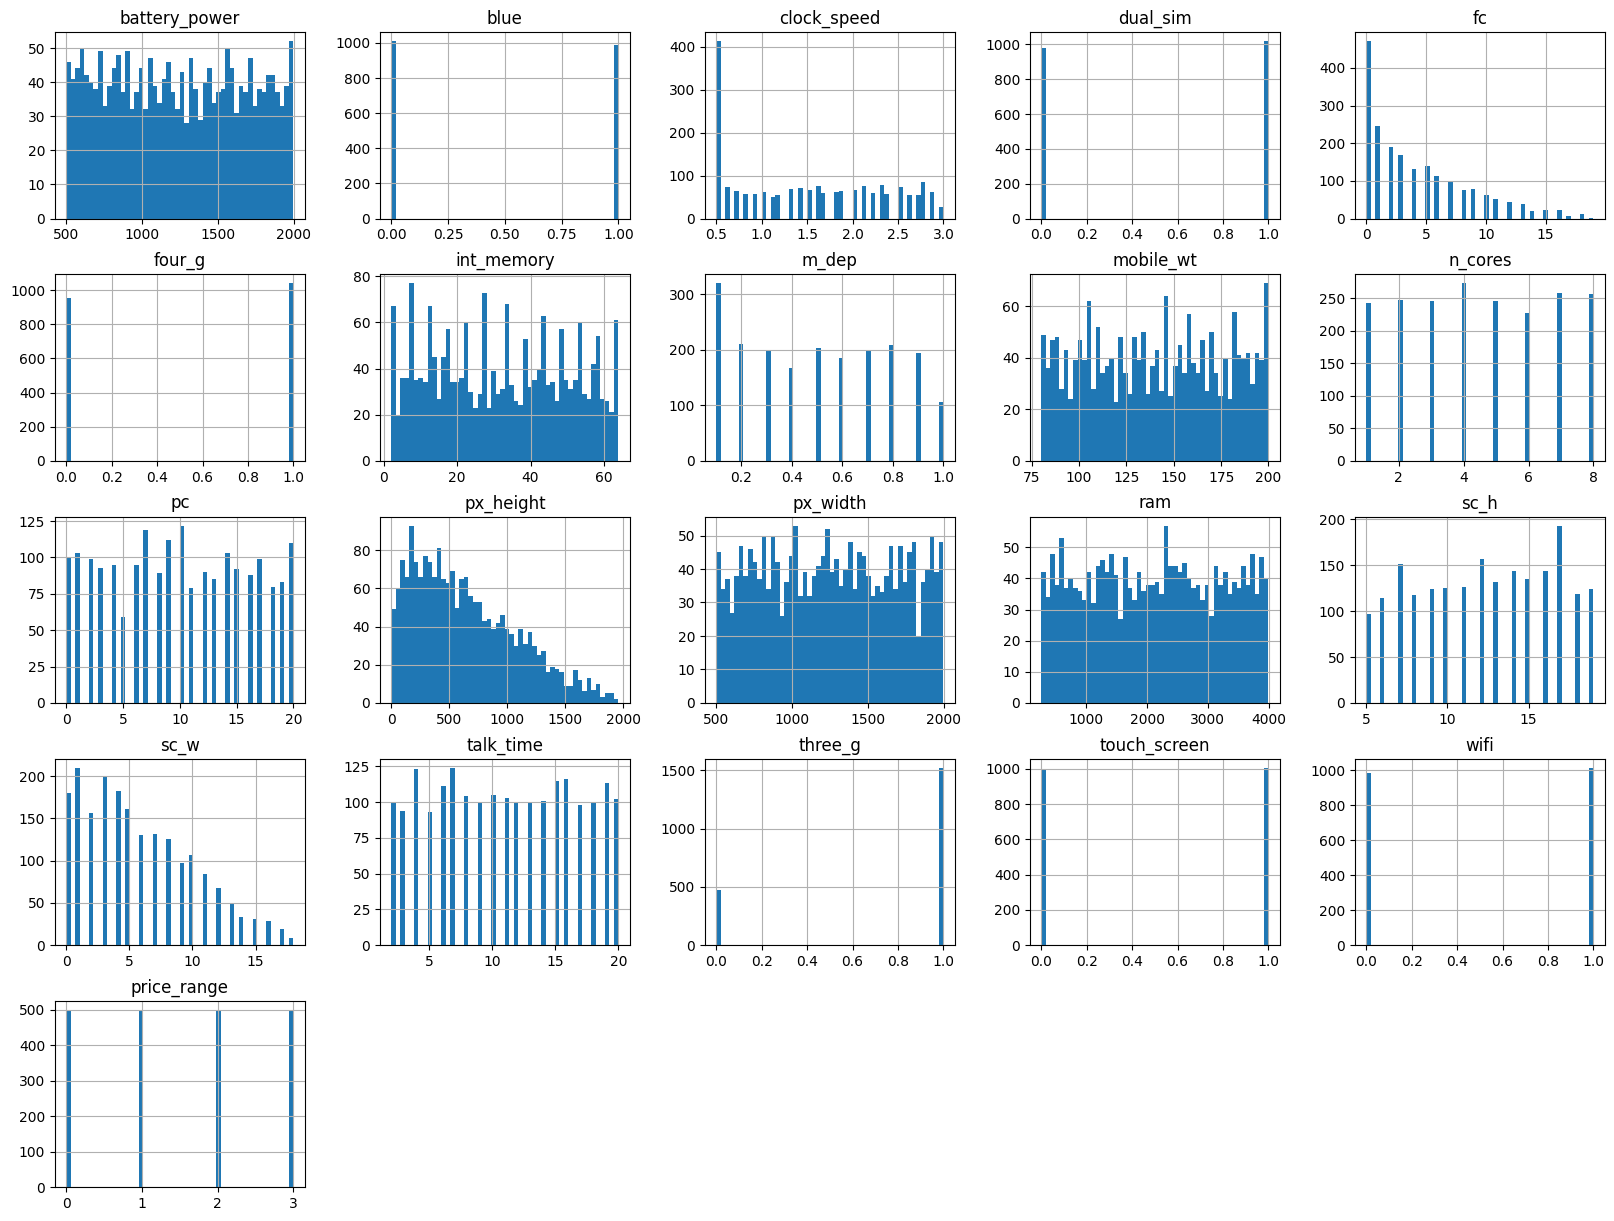

In [11]:
ds.hist(bins=50, figsize=(20,15))

Scatter plot to visualize the relationships between features:

array([[<Axes: xlabel='price_range', ylabel='price_range'>,
        <Axes: xlabel='ram', ylabel='price_range'>,
        <Axes: xlabel='battery_power', ylabel='price_range'>,
        <Axes: xlabel='px_width', ylabel='price_range'>,
        <Axes: xlabel='px_height', ylabel='price_range'>],
       [<Axes: xlabel='price_range', ylabel='ram'>,
        <Axes: xlabel='ram', ylabel='ram'>,
        <Axes: xlabel='battery_power', ylabel='ram'>,
        <Axes: xlabel='px_width', ylabel='ram'>,
        <Axes: xlabel='px_height', ylabel='ram'>],
       [<Axes: xlabel='price_range', ylabel='battery_power'>,
        <Axes: xlabel='ram', ylabel='battery_power'>,
        <Axes: xlabel='battery_power', ylabel='battery_power'>,
        <Axes: xlabel='px_width', ylabel='battery_power'>,
        <Axes: xlabel='px_height', ylabel='battery_power'>],
       [<Axes: xlabel='price_range', ylabel='px_width'>,
        <Axes: xlabel='ram', ylabel='px_width'>,
        <Axes: xlabel='battery_power', ylabel='px_widt

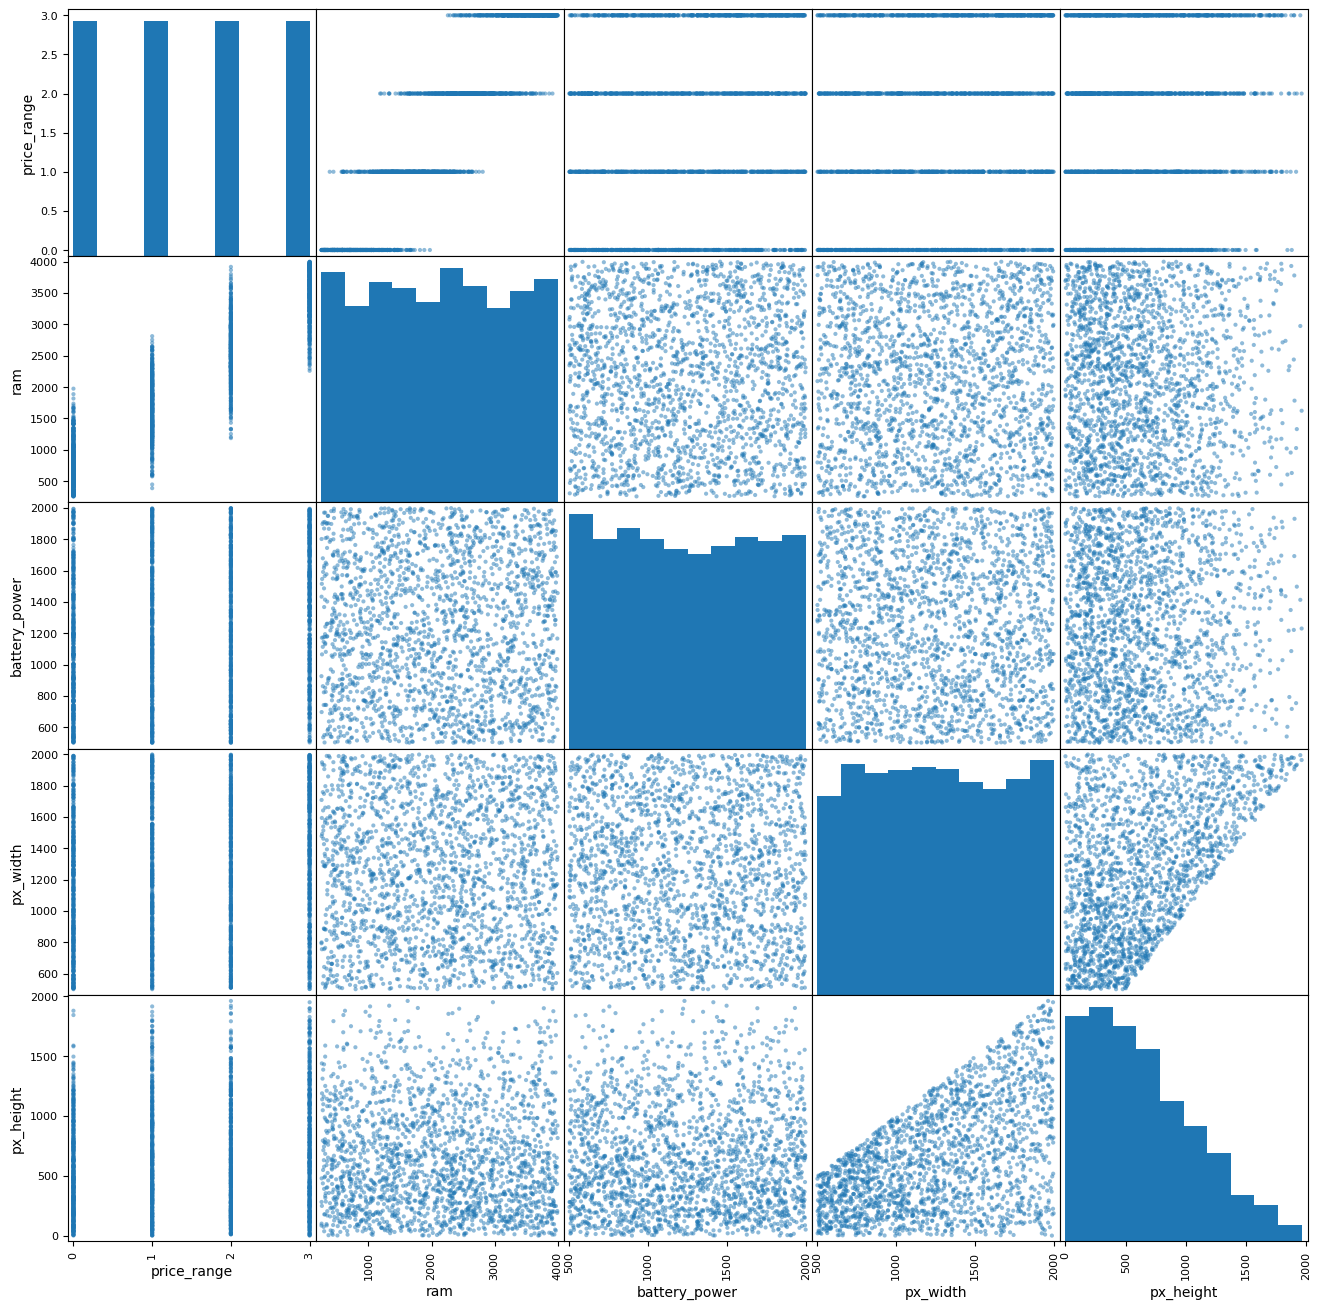

In [12]:
# plotting just top 6 because 11 * 11 scatter_matrix is not clear
from pandas.plotting import scatter_matrix
scatter_matrix(ds[highest_corr_features[:5]], figsize=(16, 16))

## Cleaning/Preparing Data

### Data Imputation

The dataset contains a relatively small number of missing values across columns. While one option is to drop these columns, considering the dataset's modest size (2000 samples), employing an imputation method could help preserve valuable data. It's crucial to tailor the imputation strategy to the nature of the data. For instance, for boolean features like `wifi` and `blue`, imputing with the mean wouldn't be appropriate since they're categorical variables. Instead, imputing missing values in boolean columns with the mode (most frequent value) would be more suitable. Conversely, for continuous variables, utilizing the mean or median might be more effective. Adopting such a tailored approach ensures optimal handling of missing data while retaining the integrity of the dataset.

In [13]:
quick_dict = lambda strategy : {'missing_values': np.nan, 'strategy': strategy}

mean_args   = quick_dict("mean")
median_args = quick_dict("median")
mfreq_args  = quick_dict("most_frequent")
const_args  = quick_dict("constant")
const_args.update({"fill_value": 0})

mean_cols   = ['m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w']
median_cols = ['fc', 'pc', 'n_cores']
const_cols  = ['four_g']
mfreq_cols  = ['int_memory', 'ram']

cols_args_pair = (
    (mean_cols,   mean_args),
    (median_cols, median_args),
    (mfreq_cols,  mfreq_args),
    (const_cols,  const_args)
)
for i in cols_args_pair:
    print(i)

(['m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w'], {'missing_values': nan, 'strategy': 'mean'})
(['fc', 'pc', 'n_cores'], {'missing_values': nan, 'strategy': 'median'})
(['int_memory', 'ram'], {'missing_values': nan, 'strategy': 'most_frequent'})
(['four_g'], {'missing_values': nan, 'strategy': 'constant', 'fill_value': 0})


#### `CustomImputer` Transformer

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

In [15]:
from sklearn.impute import SimpleImputer

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_args_pairs):
        self.columns = None
        self.imputers = []
        self.imputation_columns = []
        self.columns_args_pairs = columns_args_pairs
        for cols, args in self.columns_args_pairs:
            self.imputers.append(SimpleImputer(**args))
            self.imputation_columns.append(cols)
    def fit(self, X, y=None):
        self.columns = X.columns
        for imputer, cols in zip(self.imputers, self.imputation_columns):
            imputer.fit(X[cols], y)
        return self
    def transform(self, X):
        Xtransformed = X.copy()
        for imputer, cols in zip(self.imputers, self.imputation_columns):
            Xtransformed[cols] = imputer.transform(Xtransformed[cols])
        return pd.DataFrame(columns=self.columns, data=Xtransformed)

`CustomImputer` Class imputes each group of columns with their suitable strategy.

Let's try it:

In [16]:
CI = CustomImputer(cols_args_pair)
mod_ds = CI.fit_transform(ds)
mod_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Now, Our data-set is fully imputed!

### Feature Engineering

I believe combining existing data could yield highly valuable insights. Therefore, let's create a transformer specifically for this purpose:

In [17]:
# operations:
def ADD(x, y):
    return x + y
def MUL(x, y):
    return x * y
def DIV(x, y):
    return x / (y + 1)  # +1 to avoid dividing by zero

class MakerHelper:
    def __init__(self, result_column, columns, operation, prefix='___'):
        self.res = prefix + result_column                # Add `prefix` before the result column name to distinguish it from the original data cloumns 
        self.cols = columns
        self.oper = operation
    def applyto(self, df):
        tmp = df[self.cols[0]]
        for i in range(1, len(self.cols)):
            tmp = self.oper(tmp, df[self.cols[i]])
        df[self.res] = tmp


`MakerHelper` class applies operation to a set of columns and store it in new column.

Let's try that:

In [18]:
tmp = mod_ds.copy()
mh = MakerHelper('tc', ('pc', 'fc'), ADD)
mh.applyto(tmp)
tmp[['pc', 'fc', '___tc']]

,pc,fc,___tc
0,2.0,1.0,3.0
1,6.0,0.0,6.0
2,6.0,2.0,8.0
3,9.0,0.0,9.0
4,14.0,13.0,27.0
...,...,...,...
1995,14.0,0.0,14.0
1996,3.0,0.0,3.0
1997,3.0,1.0,4.0
1998,5.0,4.0,9.0


#### `FeaturesMaker` Transformer

In [19]:
class FeaturesMaker(BaseEstimator, TransformerMixin):
    def __init__(self, params):
        self.params = params
        self.makers = []
    def fit(self, X, y=None):
        for res_col, cols, op in self.params:
            self.makers.append(MakerHelper(result_column=res_col, columns=cols, operation=op))
        return self
    def transform(self, X):
        Xtransformed = X.copy()
        for maker in self.makers:
            maker.applyto(Xtransformed)
        return Xtransformed

Let's try our transformer:

In [20]:
combined_features = (
    ('network_compatibility', ('four_g', 'three_g', 'wifi', 'blue', 'dual_sim'), ADD),
    ('sc_aspect_ratio', ('sc_h', 'sc_w'), DIV),
    ('battery_capacity', ('battery_power', 'talk_time'), MUL),
    ('tc', ('fc', 'pc'), ADD),
    ('n_cores_over_ram', ('n_cores', 'ram'), DIV),
    ('sc_sz', ('sc_w', 'sc_h'), MUL),
    ('mob_sz', ('___sc_sz', 'm_dep'), MUL),
    ('px_density', ('px_width', 'px_height'), MUL),
    ('px_density', ('___px_density', '___sc_sz'), DIV),
    ('screen_points', ('___px_density', 'touch_screen'), MUL),
)

In [21]:
FM = FeaturesMaker(combined_features)
mod_ds = FM.fit_transform(mod_ds)
mod_ds

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,price_range,___network_compatibility,___sc_aspect_ratio,___battery_capacity,___tc,___n_cores_over_ram,___sc_sz,___mob_sz,___px_density,___screen_points
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,1,1.0,1.125000,15998,3.0,0.000784,63.0,37.8,236.250000,0.000000
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,2,4.0,4.250000,7147,6.0,0.001140,51.0,35.7,34598.846154,34598.846154
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,2,4.0,3.666667,5067,8.0,0.001920,22.0,19.8,94230.782609,94230.782609
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,2,2.0,1.777778,6765,9.0,0.002166,128.0,102.4,16835.472868,0.000000
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1,3.0,2.666667,27315,27.0,0.001416,16.0,9.6,86123.294118,86123.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,0,4.0,2.600000,15086,14.0,0.008969,52.0,41.6,43576.981132,43576.981132
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,2,4.0,1.000000,31440,3.0,0.001968,110.0,22.0,16197.972973,16197.972973
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,3,3.0,4.500000,9555,4.0,0.002616,9.0,6.3,141657.600000,141657.600000
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,0,3.0,1.636364,28728,9.0,0.005747,180.0,18.0,1243.756906,1243.756906


Note: the new created features has the prefix "___"

In [22]:
corr_matrix = mod_ds.corr()
price_corr = corr_matrix[LABEL].sort_values(ascending=False)
# del tmp
price_corr

price_range                 1.000000
ram                         0.917084
battery_power               0.200723
px_width                    0.166077
px_height                   0.148095
___battery_capacity         0.129498
int_memory                  0.042461
___sc_sz                    0.041412
sc_w                        0.038775
___network_compatibility    0.038504
pc                          0.034598
___tc                       0.033596
___px_density               0.033548
___mob_sz                   0.026817
fc                          0.024893
three_g                     0.023611
sc_h                        0.023299
talk_time                   0.021859
blue                        0.020573
wifi                        0.018785
dual_sim                    0.017444
four_g                      0.015217
___screen_points            0.012283
n_cores                     0.004695
m_dep                      -0.000083
clock_speed                -0.006606
___sc_aspect_ratio         -0.009622
t

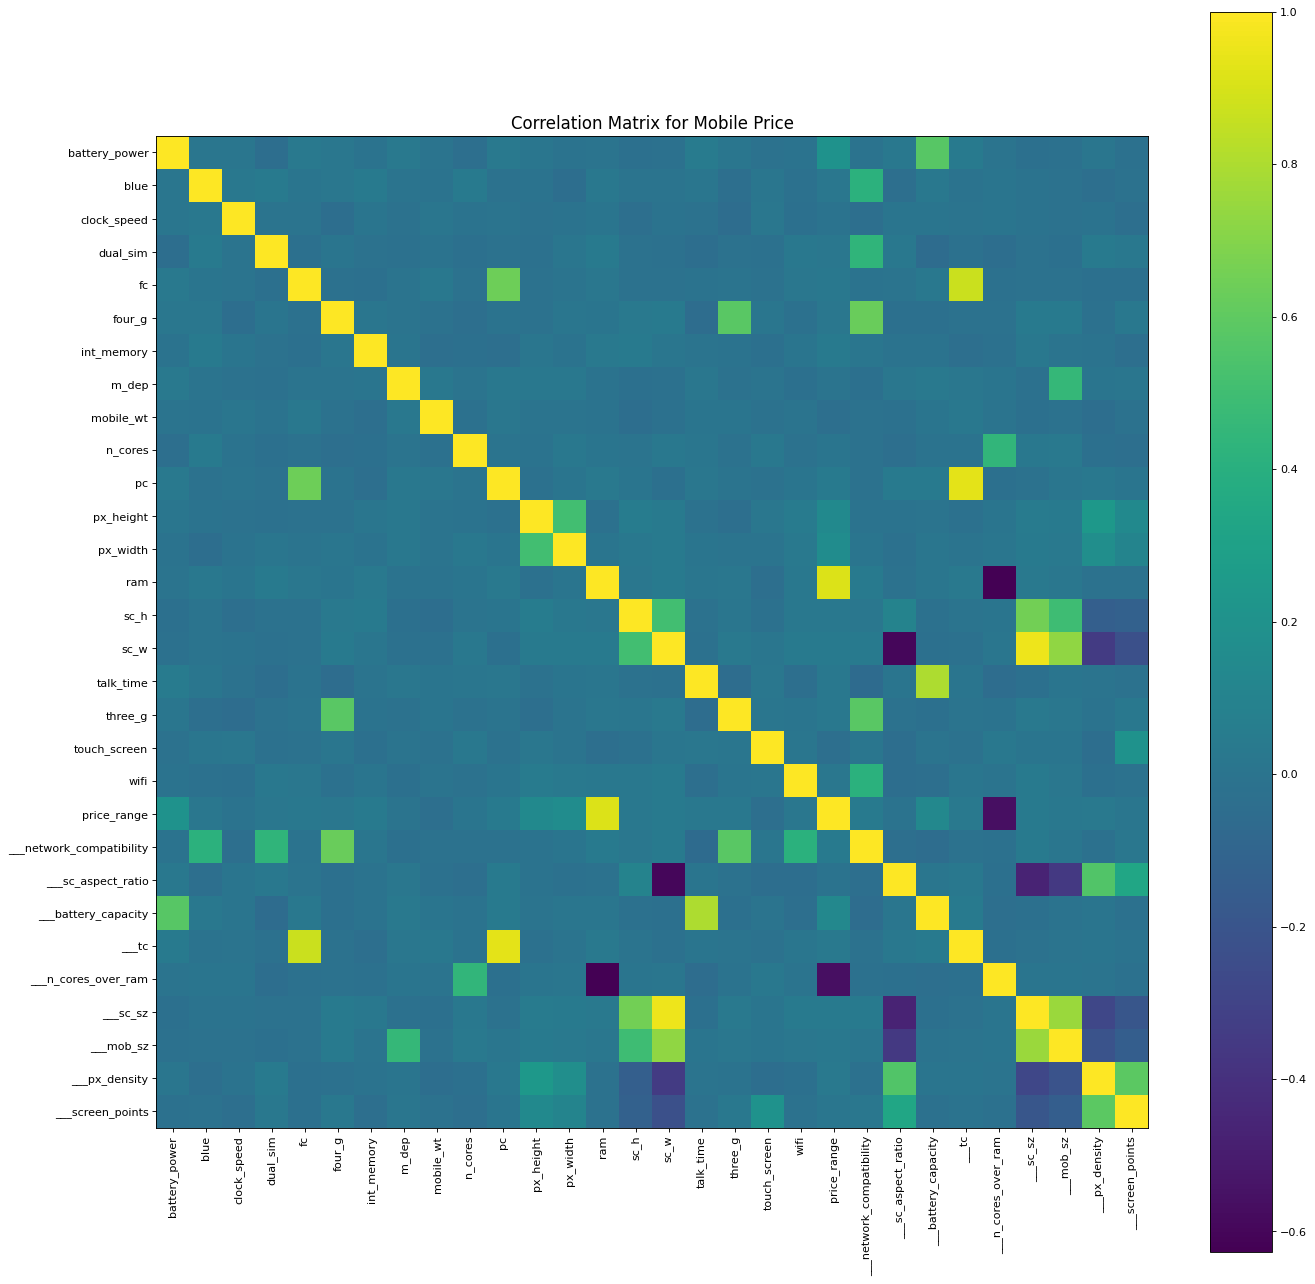

In [23]:
plotCorrelationMatrix(mod_ds, 20)

### Feature Selection

#### `FeatureSelector` Transformer

In [24]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    '''
    Transformer selects top features according to their correlation to the label column. 
    If `corr`[`feature`] >= `threshold` or `corr`[`feature`] <= `-threshold` then it will be selected.
    '''
    def __init__(self, labels, threshold=0.02):
        self.threshold = threshold
        self.labels = labels
    def most_important_features(self, X):
        X[LABEL] = self.labels 
        corr_matrix = X.corr()
        corr = corr_matrix[LABEL]
        features = corr.index
        return [
            feature for feature in features 
                if feature != LABEL and (
                    corr[feature] >= self.threshold or corr[feature] <= -self.threshold
                    ) 
        ]
    def fit(self, X, y=None):
        self.high_corr_features = self.most_important_features(X.copy())
        return self
    def transform(self, X):
        return X[self.high_corr_features]

In [25]:
labels = ds[LABEL]
FS = FeatureSelector(labels, threshold=0.03)
tmp = FS.fit_transform(mod_ds)
tmp

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_w,touch_screen,___network_compatibility,___battery_capacity,___tc,___n_cores_over_ram,___sc_sz,___px_density
0,842,7.0,188.0,2.0,20.0,756.0,2549.0,7.0,0,1.0,15998,3.0,0.000784,63.0,236.250000
1,1021,53.0,136.0,6.0,905.0,1988.0,2631.0,3.0,1,4.0,7147,6.0,0.001140,51.0,34598.846154
2,563,41.0,145.0,6.0,1263.0,1716.0,2603.0,2.0,1,4.0,5067,8.0,0.001920,22.0,94230.782609
3,615,10.0,131.0,9.0,1216.0,1786.0,2769.0,8.0,0,2.0,6765,9.0,0.002166,128.0,16835.472868
4,1821,44.0,141.0,14.0,1208.0,1212.0,1411.0,2.0,1,3.0,27315,27.0,0.001416,16.0,86123.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,2.0,106.0,14.0,1222.0,1890.0,668.0,4.0,1,4.0,15086,14.0,0.008969,52.0,43576.981132
1996,1965,39.0,187.0,3.0,915.0,1965.0,2032.0,10.0,1,4.0,31440,3.0,0.001968,110.0,16197.972973
1997,1911,36.0,108.0,3.0,868.0,1632.0,3057.0,1.0,1,3.0,9555,4.0,0.002616,9.0,141657.600000
1998,1512,46.0,145.0,5.0,336.0,670.0,869.0,10.0,1,3.0,28728,9.0,0.005747,180.0,1243.756906


### Data Scaling

Some machine learning algorithms, such as SVM or KNN, perform better when input features are scaled. But, It's nonesense to scale a discrete data (such as `wifi`, `blue`, *etc...*) so, we should make sure that we scale the continues data that have a relatively high number of unique values or bigger than a certain threshold 

In [26]:
for col in mod_ds:
    print(f'Column["{col}"] has {mod_ds[col].nunique()} unique values')

Column["battery_power"] has 1094 unique values
Column["blue"] has 2 unique values
Column["clock_speed"] has 26 unique values
Column["dual_sim"] has 2 unique values
Column["fc"] has 20 unique values
Column["four_g"] has 2 unique values
Column["int_memory"] has 63 unique values
Column["m_dep"] has 11 unique values
Column["mobile_wt"] has 122 unique values
Column["n_cores"] has 8 unique values
Column["pc"] has 21 unique values
Column["px_height"] has 1136 unique values
Column["px_width"] has 1110 unique values
Column["ram"] has 1561 unique values
Column["sc_h"] has 16 unique values
Column["sc_w"] has 20 unique values
Column["talk_time"] has 19 unique values
Column["three_g"] has 2 unique values
Column["touch_screen"] has 2 unique values
Column["wifi"] has 2 unique values
Column["price_range"] has 4 unique values
Column["___network_compatibility"] has 6 unique values
Column["___sc_aspect_ratio"] has 121 unique values
Column["___battery_capacity"] has 1842 unique values
Column["___tc"] has 

In [27]:
VALUES_UNIQUENESS_THRESHOLD = 10

to_keep_features = [col for col in mod_ds if mod_ds[col].nunique() <= VALUES_UNIQUENESS_THRESHOLD]
to_keep_features.remove(LABEL)
to_keep_features

['blue',
 'dual_sim',
 'four_g',
 'n_cores',
 'three_g',
 'touch_screen',
 'wifi',
 '___network_compatibility']

#### `CustomSTDScaler` Transformer

In [28]:
from sklearn.preprocessing import StandardScaler

class CustomSTDScaler(StandardScaler):
    '''
    `StandardScaler` scaling a specific columns (columns that have unique values number <= threshould) and returns pandas.DataFrame 
    instead of numpy array when transform is invoked.
    '''
    def __init__(self, values_uniqueness_threshold=10):
        self.columns = None
        self.keep_features = None
        self.values_uniqueness_threshold = values_uniqueness_threshold
        StandardScaler.__init__(self)
    def fit(self, X, y=None):
        self.keep_features = [col for col in X if X[col].nunique() <= self.values_uniqueness_threshold]
        self.columns = [col for col in X if col not in self.keep_features]
        StandardScaler.fit(self, X[self.columns])
        return self
    def transform(self, X):
        Xtransformed = X.copy()
        Xtransformed[self.columns] = StandardScaler.transform(self, X[self.columns])
        return Xtransformed

CS = CustomSTDScaler()

mod_ds = CS.fit_transform(mod_ds.drop(LABEL, axis=1))
mod_ds

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,___network_compatibility,___sc_aspect_ratio,___battery_capacity,___tc,___n_cores_over_ram,___sc_sz,___mob_sz,___px_density,___screen_points
0,-0.902597,0,0.830779,0,-0.763785,0.0,-1.381575,0.339276,1.350676,2.0,...,1,1.0,-0.611076,0.250945,-1.189160,-0.679514,-0.224347,-0.039747,-0.293903,-0.205915
1,-0.495139,1,-1.253064,1,-0.994745,1.0,1.156918,0.686381,-0.120727,3.0,...,0,4.0,0.403083,-0.742993,-0.871287,-0.584292,-0.380600,-0.081592,-0.193886,-0.044321
2,-1.537686,1,-1.253064,1,-0.532825,1.0,0.494703,1.380591,0.133939,5.0,...,0,4.0,0.213773,-0.976570,-0.659373,-0.375286,-0.758212,-0.398423,-0.020317,0.234191
3,-1.419319,1,1.198517,0,-0.994745,0.0,-1.216021,1.033486,-0.262208,6.0,...,0,2.0,-0.399230,-0.785890,-0.553415,-0.309410,0.622025,1.247504,-0.245589,-0.205915
4,1.325906,1,-0.395011,0,2.007736,1.0,0.660256,0.339276,0.020754,2.0,...,0,3.0,-0.110758,1.521806,1.353817,-0.510201,-0.836339,-0.601673,-0.043915,0.196325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.994745,1.0,-1.657498,1.033486,-0.969613,6.0,...,0,4.0,-0.132393,0.148530,-0.023628,1.512660,-0.367579,0.035974,-0.167753,-0.002388
1996,1.653694,1,1.321096,1,-0.994745,0.0,0.384333,-1.049145,1.322380,4.0,...,1,4.0,-0.651642,1.985029,-1.189160,-0.362587,0.387645,-0.354585,-0.247444,-0.130262
1997,1.530773,0,-0.762748,1,-0.763785,1.0,0.218779,0.686381,-0.913021,8.0,...,0,3.0,0.484215,-0.472582,-1.083202,-0.188871,-0.927486,-0.667430,0.117726,0.455699
1998,0.622527,0,-0.762748,0,-0.070905,1.0,0.770626,-1.396250,0.133939,5.0,...,1,3.0,-0.445123,1.680481,-0.553415,0.649782,1.299122,-0.434291,-0.290971,-0.200106


### Preparing Pipeline

In [29]:
from sklearn.pipeline import Pipeline
preparing_pipeline = Pipeline([
    ('imputer', CustomImputer(cols_args_pair)),
    ('combiner', FeaturesMaker(combined_features)),
    ('selector', FeatureSelector(labels, threshold=0.03)),
    ('scaler', CustomSTDScaler())
])
preparing_pipeline

Pipeline(steps=[('imputer',
                 CustomImputer(columns_args_pairs=((['m_dep', 'mobile_wt',
                                                     'px_height', 'px_width',
                                                     'sc_h', 'sc_w'],
                                                    {'missing_values': nan,
                                                     'strategy': 'mean'}),
                                                   (['fc', 'pc', 'n_cores'],
                                                    {'missing_values': nan,
                                                     'strategy': 'median'}),
                                                   (['int_memory', 'ram'],
                                                    {'missing_values': nan,
                                                     'strategy': 'most_frequent'}),
                                                   (['four_g'],
                                                    {'fill_value': 0,
                                                     'missing_values': na...
                                        <function MUL at 0x00000213FD949CA0>),
                                       ('px_density',
                                        ('___px_density', '___sc_sz'),
                                        <function DIV at 0x00000213FD949D30>),
                                       ('screen_points',
                                        ('___px_density', 'touch_screen'),
                                        <function MUL at 0x00000213FD949CA0>)))),
                ('selector',
                 FeatureSelector(labels=0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64,
                                 threshold=0.03)),
                ('scaler', CustomSTDScaler())])

## Models Evaluation

In [30]:
from sklearn.metrics import accuracy_score

def display_model_accuracy(model, X, y, modelname='Model', fitted=True):
    modelname = model.__class__.__name__
    if not fitted:
        model.fit(X, y)
    preds = model.predict(X)
    print(f"{modelname}'s accuracy score: {accuracy_score(y, preds) * 100}%")

In [31]:
from sklearn.model_selection import RandomizedSearchCV

def rand_search_cv(model, X, y, param_distribs, n_iter=50, cv=4):
    rnd_srch = RandomizedSearchCV(model, param_distributions=param_distribs,
                                n_iter=n_iter, cv=cv, scoring='accuracy',
                                verbose=2, random_state=42)
    rnd_srch.fit(X, y)
    return rnd_srch.best_params_, rnd_srch.best_score_

In [32]:
data = ds.copy().drop(LABEL, axis=1)
X = preparing_pipeline.fit_transform(data)
y = ds[LABEL]
X, y

(      battery_power  int_memory  mobile_wt        pc  px_height  px_width  \
 0         -0.902597   -1.381575   1.350676 -1.308565  -1.410683 -1.146424   
 1         -0.495139    1.156918  -0.120727 -0.647340   0.587958  1.705240   
 2         -1.537686    0.494703   0.133939 -0.647340   1.396447  1.075652   
 3         -1.419319   -1.216021  -0.262208 -0.151421   1.290305  1.237678   
 4          1.325906    0.660256   0.020754  0.675111   1.272238 -0.090938   
 ...             ...         ...        ...       ...        ...       ...   
 1995      -1.011860   -1.657498  -0.969613  0.675111   1.303855  1.478403   
 1996       1.653694    0.384333   1.322380 -1.143259   0.610541  1.652002   
 1997       1.530773    0.218779  -0.913021 -1.143259   0.504399  0.881220   
 1998       0.622527    0.770626   0.133939 -0.812646  -0.697044 -1.345485   
 1999      -1.658331    0.715441   0.784752  1.005724  -0.365067 -1.151053   
 
            ram      sc_w  touch_screen  ___network_compatibil

In [33]:
from sklearn.svm import SVC
svc = SVC()
display_model_accuracy(svc, X, y, fitted=False)

SVC's accuracy score: 96.6%


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
display_model_accuracy(knn, X, y, fitted=False)

KNeighborsClassifier's accuracy score: 80.95%


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
display_model_accuracy(rfc, X, y, fitted=False)

RandomForestClassifier's accuracy score: 100.0%


In [36]:
from scipy.stats import randint
param_distribs = {
    'n_estimators': randint(low=50, high=200),
    'max_features': randint(low=10, high=25)
}
rand_rfc_cv = rand_search_cv(rfc, X, y, param_distribs, 50, 4)
rand_rfc_cv

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] END ..................max_features=16, n_estimators=142; total time=   3.8s
[CV] END ..................max_features=16, n_estimators=142; total time=   3.5s
[CV] END ..................max_features=16, n_estimators=142; total time=   3.3s
[CV] END ..................max_features=16, n_estimators=142; total time=   3.3s
[CV] END ..................max_features=24, n_estimators=156; total time=   3.6s
[CV] END ..................max_features=24, n_estimators=156; total time=   3.5s
[CV] END ..................max_features=24, n_estimators=156; total time=   3.4s
[CV] END ..................max_features=24, n_estimators=156; total time=   3.5s
[CV] END ...................max_features=17, n_estimators=70; total time=   1.5s
[CV] END ...................max_features=17, n_estimators=70; total time=   1.5s
[CV] END ...................max_features=17, n_estimators=70; total time=   1.5s
[CV] END ...................max_features=17, n_

({'max_features': 10, 'n_estimators': 108}, 0.8925)

In [37]:
param_dist = {
    'n_neighbors': randint(1, 100),  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]
}
rand_knn_cv = rand_search_cv(knn, X, y, param_dist, 50, 4)
rand_knn_cv

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] END ...............n_neighbors=52, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=52, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=52, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=52, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=72, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=72, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=72, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=72, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=83, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=83, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=83, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=83, p=1, we

({'n_neighbors': 71, 'p': 1, 'weights': 'distance'}, 0.7849999999999999)

In [38]:
from scipy.stats import expon, reciprocal
param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0), 
}
rand_svc_cv = rand_search_cv(svc, X, y, param_distribs, 50, 4)
rand_svc_cv

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   0.8s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   0.4s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   0.6s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   0.7s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   0.2s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   0.2s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   0.2s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   0.2s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf; total time=   0.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf; total time=   0.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676

({'C': 16483.85052975289, 'gamma': 1.4752145260435134, 'kernel': 'linear'},
 0.9735)

## Deployment of Preparing Pipeline and Best Model

In [39]:
params = rand_svc_cv[0]
model = SVC(**params)
model.fit(X, y)

SVC(C=16483.85052975289, gamma=1.4752145260435134, kernel='linear')

In [40]:
import pickle

PIPELINE_FILE_NAME = 'Pipeline.pkl'
MODEL_FILE_NAME = 'Model.pkl'

def save_work(pipeline_fn=PIPELINE_FILE_NAME, model_fn=MODEL_FILE_NAME):
    objects_to_save = (
        (preparing_pipeline, pipeline_fn),
        (model, model_fn)
    )
    def save(obj, filename):
        with open(filename, 'wb') as f:
            print(f'Saving {obj} at:{filename}\n')
            pickle.dump(obj, f)
    for obj, filename in objects_to_save:
        save(obj, filename)

save_work()

Saving Pipeline(steps=[('imputer',
                 CustomImputer(columns_args_pairs=((['m_dep', 'mobile_wt',
                                                     'px_height', 'px_width',
                                                     'sc_h', 'sc_w'],
                                                    {'missing_values': nan,
                                                     'strategy': 'mean'}),
                                                   (['fc', 'pc', 'n_cores'],
                                                    {'missing_values': nan,
                                                     'strategy': 'median'}),
                                                   (['int_memory', 'ram'],
                                                    {'missing_values': nan,
                                                     'strategy': 'most_frequent'}),
                                                   (['four_g'],
                                                    {'fill_val